In [166]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from kuramoto1 import Kuramoto
import extract as xfn
import IS as IS
sns.reset_orig()
plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Find nearest neighbours

In [2]:
# Create lists of coord data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t+ 'Project/' + experiment)
blnlist = sorted(glob.glob('*0.610bin0.23nnbav.npy*')) 
nnblist = sorted(glob.glob('*-03*BLN*nnb.npy*')) 
pnnblist = sorted(glob.glob('*PTZ20*nnb.npy*')) 
coordlist = sorted(glob.glob('*-03*_PTZ20*realcoord*'))
rad = sorted(glob.glob('*radius*'))

In [ ]:
#Calculate nearest neighbours for each cell 
#rng = nearest number of cells with which to build neighbour graph from
#dim = define distance of each pixel in x,y,z, cnt = select which % of neighbours to include
#-------------------------------------------------------------------------------------------------
#Fnnb = crfn.neighbour(coordlist, F10t, experiment, rng = 6000, dim = [.8, .8, 15], cnt = 0.23)
for i in range(len(newcoordlist)):
    paramlist = [F10t, experiment, 6000, [.8, .8, 15], newcoordlist[i]]
    adfn.parallel(2, [cntlist], crfn.neighbour, paramlist)

In [ ]:
#PLOT - included nearest neighbours
#--------------------------------------------------
pltfn.rasplot(namelist = nnblist)

In [ ]:
#Calculate 30um equivalent for each fish 
num = adfn.name_zero('front', 2, 12, 1)
dist = np.zeros((11,23))
count = 0
for i in num:
    os.chdir(Fdrop + 'Project/' + experiment)
    coordlist = sorted(glob.glob('*' + i +  '*BLN*realcoord.npy'))
    coord = np.load(coordlist[0])[:,:2]
    xlen = np.max(coord[:,0]) - np.min(coord[:,0])
    ylen = np.max(coord[:,1]) - np.min(coord[:,1])
    os.chdir(F10t + 'Project/' + experiment)
    numb = adfn.name_zero('back', 0.04, 0.23, 0.01)
    count1 = 0
    for e in numb:
        nnblist = sorted(glob.glob('*' + i +  '*BLN*' + e + '*nnb.npy'))
        centrecell = coord[0]
        surroundcells = coord[np.where(np.load(nnblist[0])[0] == 1)[0]]
        distvec = np.zeros(surroundcells.shape[0])
        for t in range(surroundcells.shape[0]):
            distvec[t] = np.linalg.norm(centrecell - surroundcells[t])
        dist[count, count1] = np.max(distvec)
        count1+=1
    count+=1
    print('Done fish' + str(i))

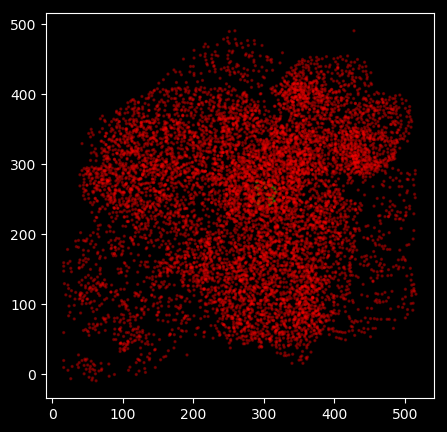

In [169]:
# Plot an illustrative example
#rdshift - right down, rushift - right up
#------------------------------------------------------
cell, fnum, condition, xshift, yshift = 10 ,'02', 'BLN', 10, 15
os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*' + fnum +  '*' + condition + '*realcoord.npy'))
cs = np.load(coordlist[0])             # 3D array of xyz coordinates
os.chdir(F10t + 'Project/' + experiment)
nnblist = sorted(glob.glob('*' + fnum +  '*' + condition + '*0.23nnb.npy'))
nnb = np.load(nnblist[0])
plt.figure(figsize = (5,5))
plt.scatter(cs[:,0]+xshift, cs[:,1]-yshift, s = 2, c = nnb[cell], cmap = 'prism', alpha = 0.3)
plt.show()

# Calculate avalanche statistics

In [3]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnbin = sorted(glob.glob('*BLN*binarised.npy'))
p20bin = sorted(glob.glob('*PTZ20*binarised.npy'))
blnnnb = sorted(glob.glob('*BLN*nnb*'))
p20nnb = sorted(glob.glob('*PTZ20*nnb*'))
blnraw, p20raw
blnbin, p20bin

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-BLN-PTZ05-PTZ20_run-01_binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.590b

In [29]:
gen_nnblist

array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
       'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy'],
      dtype='<U61')

1


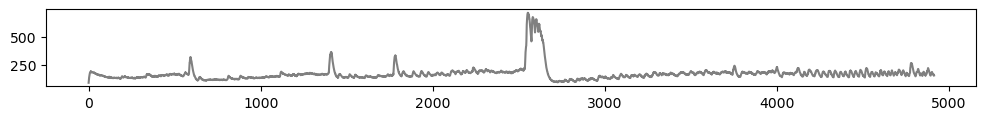

3


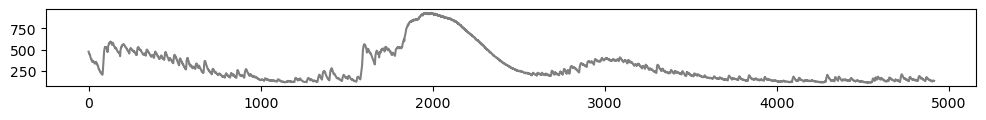

4


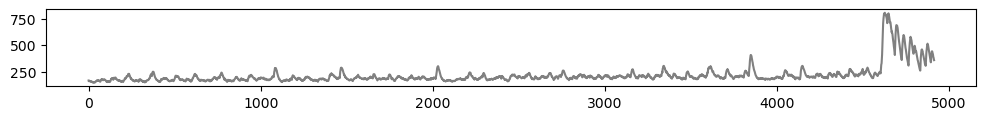

6


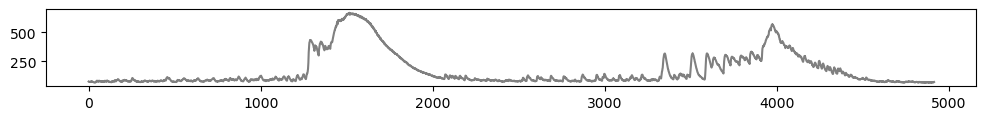

7


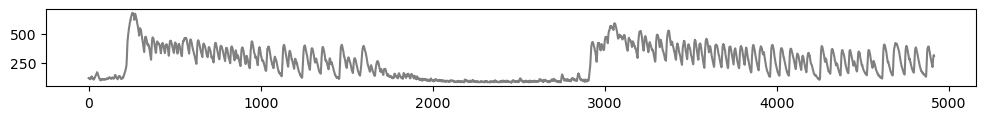

8


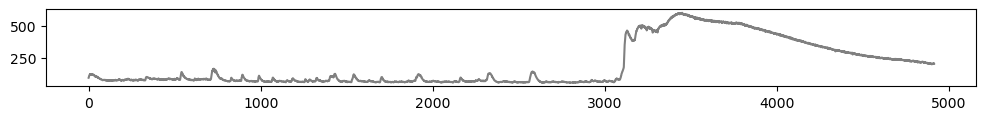

9


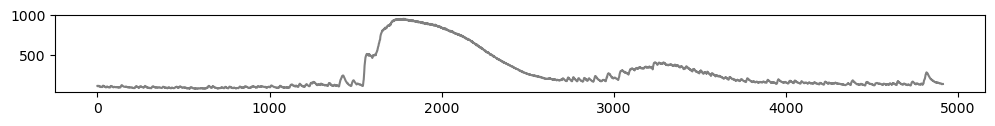

10


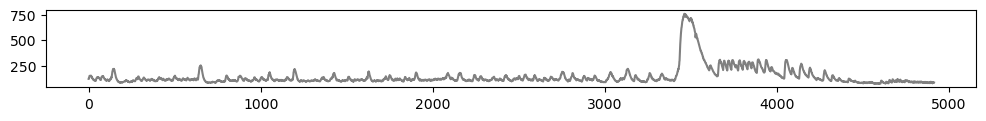

11


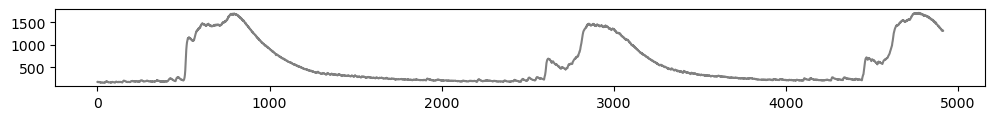

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
       dtype='<U66'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-03_2photon_sess-01-BLN-PTZ05-PTZ20_run-01_binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-06_2photon_se

In [86]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    if 4*mini < maxi:
        fig, ax = plt.subplots(figsize= (12,1)) 
        print(o + 1)
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, p20raw[o])
        gen_blist = np.append(gen_blist, p20bin[o])
        gen_nnblist = np.append(gen_nnblist, p20nnb[o])
        sub_bln_list = np.append(sub_bln_list, blnraw[o])
        sub_bln_blist = np.append(sub_bln_blist, blnbin[o])
        sub_bln_nnblist = np.append(sub_bln_nnblist, blnnnb[o])
        sub_p5_list = np.append(sub_p5_list, p5raw[o])
        plt.show()
gen_list, gen_blist, gen_nnblist

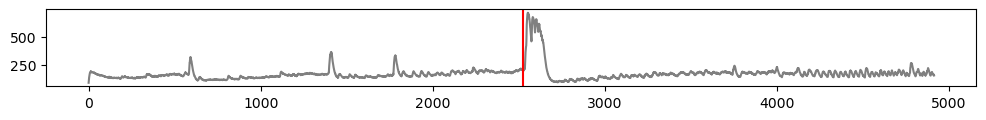

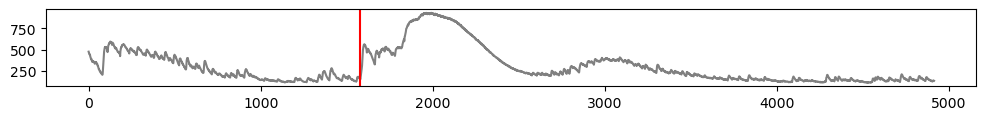

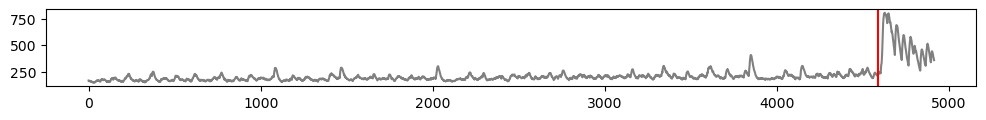

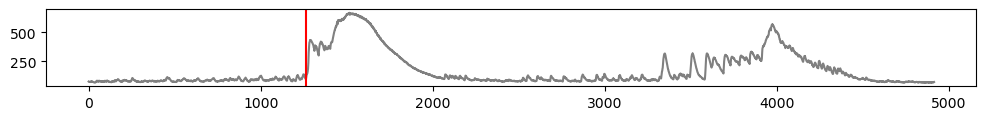

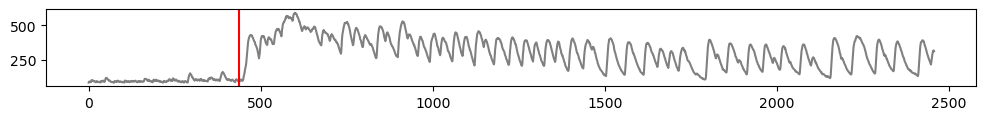

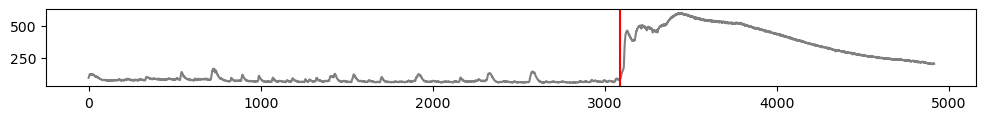

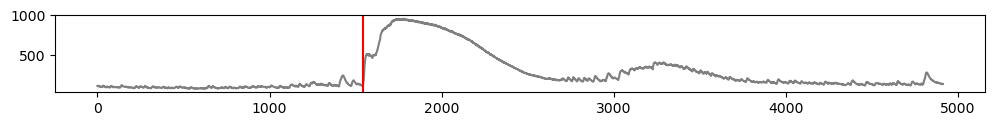

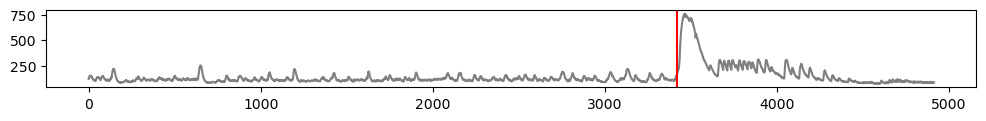

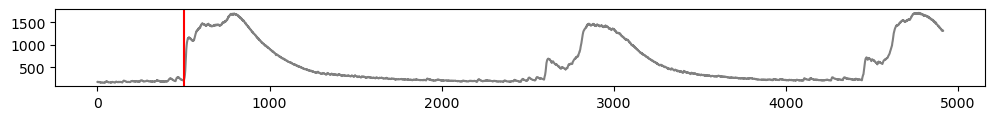

In [87]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    if o == 4:
        mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (12,1))  
    when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, c = 'grey')
    for x in when: plt.axvline(x=x, c='red')
    max_list[o] = np.where(maxs ==  np.max(maxs))[0]
    plt.show()

In [157]:
#Time series for baseline, preictal, ictal analysis
import random
window = 400
bln_list, bln_blist = list(range(len(gen_list))),list(range(len(gen_list)))
pre_list, pre_blist = list(range(len(gen_list))),list(range(len(gen_list)))
p20_list, p20_blist = list(range(len(gen_list))),list(range(len(gen_list)))

for e in range(len(gen_list)):
    bln_ran = random.randint(0,4914-window)
    bln_list[e] = np.load(sub_bln_list[e])[:,bln_ran:bln_ran+window]
    bln_blist[e] = np.load(sub_bln_blist[e])[:,bln_ran:bln_ran+window]
    if e == 4:
        pre_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
    else:
        pre_list[e] = np.load(gen_list[e])[:,max_list[e][0]-window:max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]-window:max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,max_list[e][0]:max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]:max_list[e][0]+window]

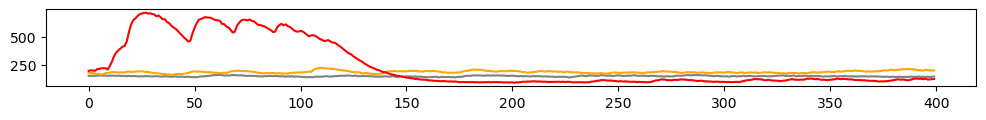

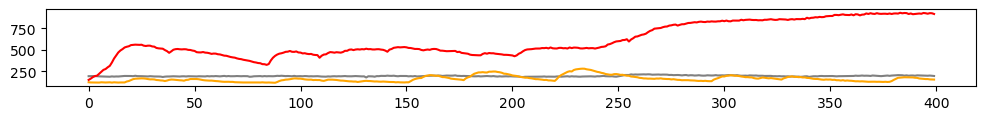

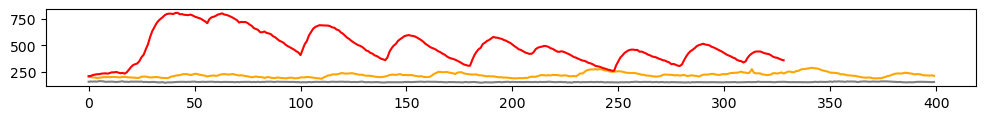

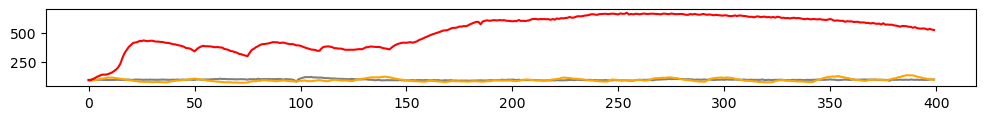

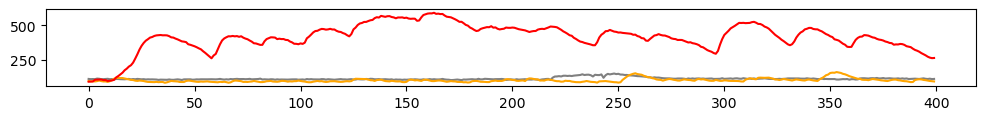

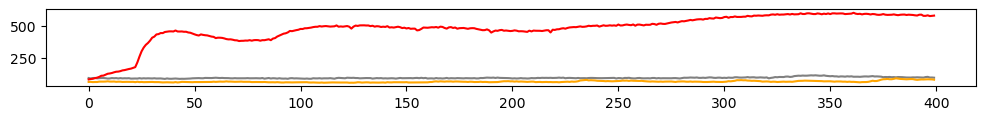

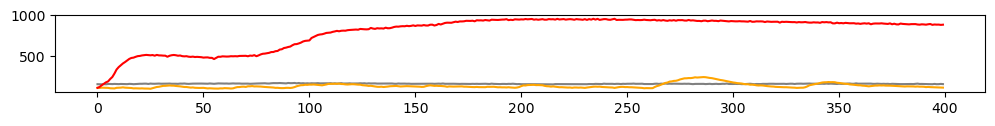

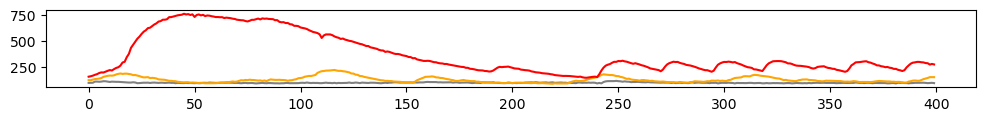

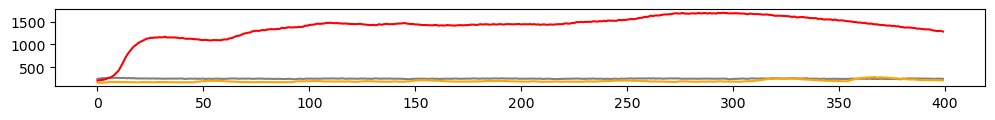

In [158]:
#Check time series
for i in range(len(bln_list)):
    fig, ax = plt.subplots(figsize= (12,1))  
    mean = np.apply_along_axis(np.mean, 0, bln_list[i])
    plt.plot(mean, c='grey')
    mean = np.apply_along_axis(np.mean, 0, pre_list[i])
    plt.plot(mean, c='orange')
    mean = np.apply_along_axis(np.mean, 0, p20_list[i])
    plt.plot(mean, c='red')
    plt.show()

In [163]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coords = sorted(glob.glob('*02*realcoord*'))
coords

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_realcoord.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_realcoord.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy']

Doing row 0 of 8350
Doing row 835 of 8350
Doing row 1670 of 8350
Doing row 2505 of 8350
Doing row 3340 of 8350
Doing row 4175 of 8350
Doing row 5010 of 8350
Doing row 5845 of 8350
Doing row 6680 of 8350
Doing row 7515 of 8350
doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


/Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]


Doing row 0 of 8971
Doing row 897 of 8971
Doing row 1794 of 8971
Doing row 2691 of 8971
Doing row 3588 of 8971
Doing row 4485 of 8971
Doing row 5382 of 8971
Doing row 6279 of 8971
Doing row 7176 of 8971
Doing row 8073 of 8971
Doing row 8970 of 8971
doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


/Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]


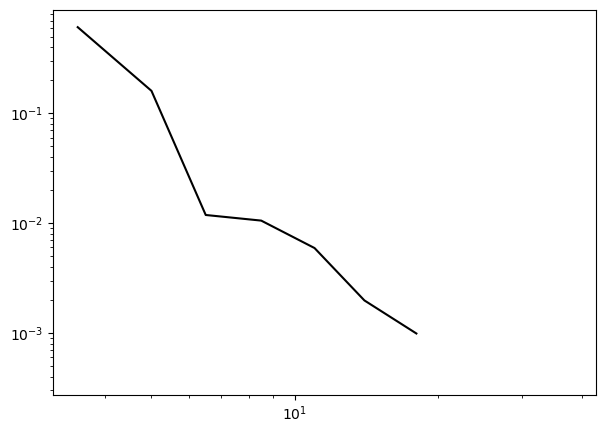

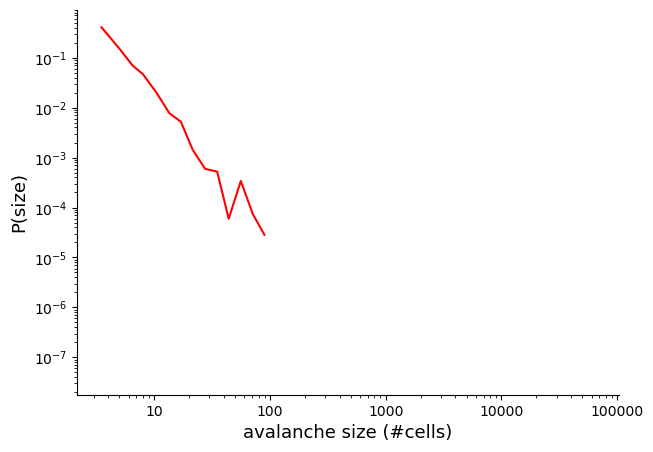

In [178]:
p20_data = p20_list[0]
bln_data = bln_list[0]
bln_coords = coords[0]
p20_coords = coords[2]
listlist = [bln_data, p20_data]
lamb = 0.5 #calcium decay = 0.5
varB = 0.001 #baseline variance = 0.001
varC = 1 #calcium variance = 1
Cmean = 0.2 #mean calcium = 0.2
frequency = 2.7 #frequency = 2.7
gausfilt = 0.6 #gausfilt = 0.6
mode = 'save'
listlist = [p20_list]
namelist = ['p20_short']
o_list = [2, 4, 5, 7, 8, 9, 10, 11, 12]


nnb = crfn.neighbour_r(np.load(bln_coords), 0.3125, 6000, [1, 1, 1])
c, sks, B = xfn.bcl_function_parameters(0.475, Fdrop, experiment, namelist[0], bln_data, lamb, varB, varC, Cmean, frequency, gausfilt, mode)
avs = crfn.avalanche_r(nnb, sks)
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))

powerlaw.plot_pdf(avs[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')


nnb = crfn.neighbour_r(np.load(p20_coords), 0.3125, 6000, [1, 1, 1])
c, sks, B = xfn.bcl_function_parameters(0.475, Fdrop, experiment, namelist[0], p20_data, lamb, varB, varC, Cmean, frequency, gausfilt, mode)
avs = crfn.avalanche_r(nnb, sks)
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))

powerlaw.plot_pdf(avs[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')


axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 100000)  
#plt.ylim(bottom = 0.000005)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


In [131]:
# Avalanche calculation
#---------------------------------------------------------------------------
p20_binlist = sorted(glob.glob('p20_short_0.75*')) #iterated list - binarised trace
gen_nnblist, p20_binlist

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy'],
       dtype='<U61'),
 ['p20_short_0.75_02_binarised.npy',
  'p20_short_0.75_04_binarised.npy',
  'p20_short_0.75_05_binarised.npy',
  'p20_short_0.75_07_binarised.npy',
  'p20_short_0.75_08_binarised.npy',
  'p20_short_0.75_09_binarised.npy',
  'p20_short_0.75_10_binarised.npy',
  'p20_short_0.75_11_binarised.npy',
  'p20_short_0.75_12_bin

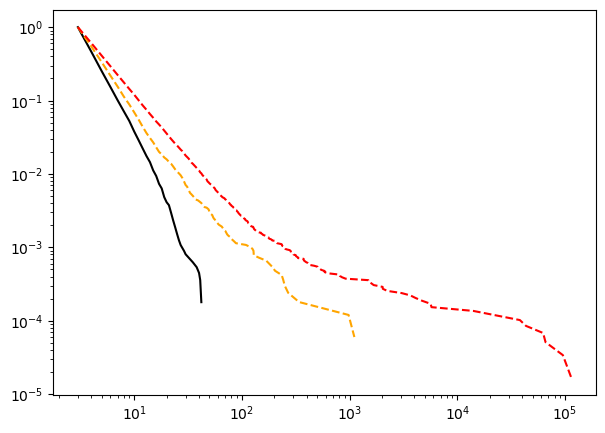

In [170]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------

choose = 0
bln_distlist = [bln_av[i][choose] for i in range(len(bln_av))]
pre_distlist = [pre_av[i][choose] for i in range(len(pre_av))]
p20_distlist = [p20_av[i][choose] for i in range(len(p20_av))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')
plt.show()

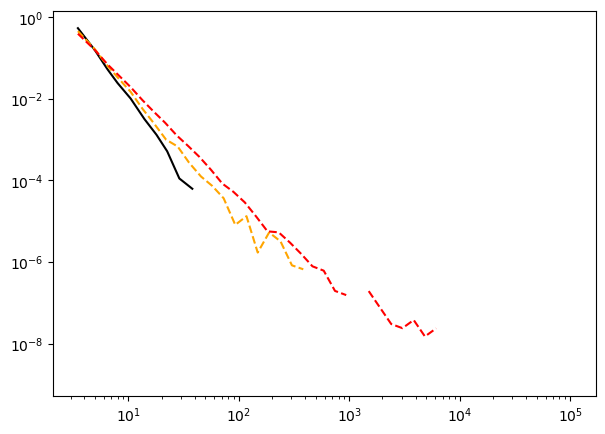

In [173]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
choose = 0
bln_distlist = [bln_av[i][choose] for i in range(len(bln_av))]
pre_distlist = [pre_av[i][choose] for i in range(len(pre_av))]
p20_distlist = [p20_av[i][choose] for i in range(len(p20_av))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_pdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
avdistcut = pre_vec
powerlaw.plot_pdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_pdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')
plt.show()

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


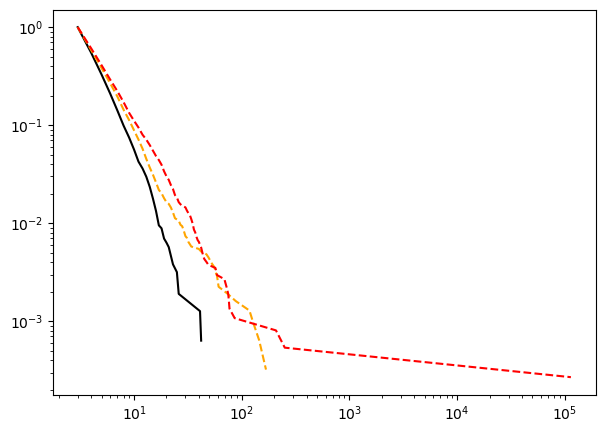

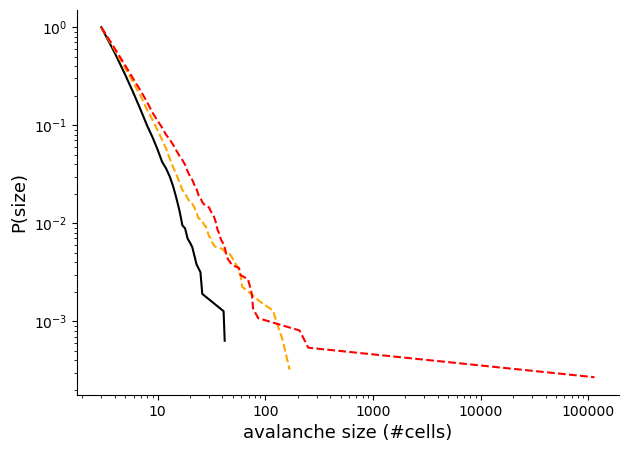

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


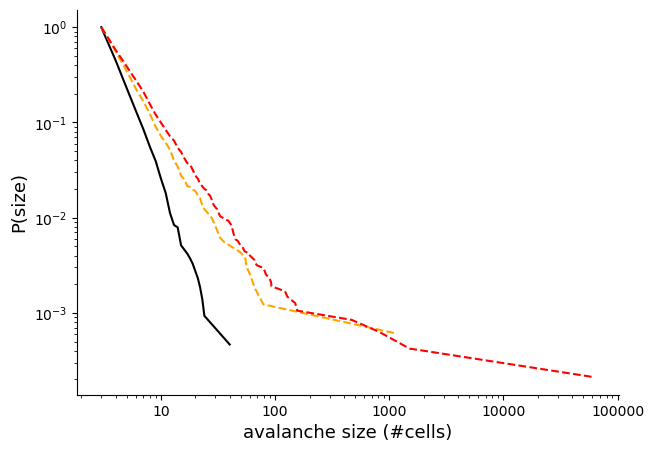

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


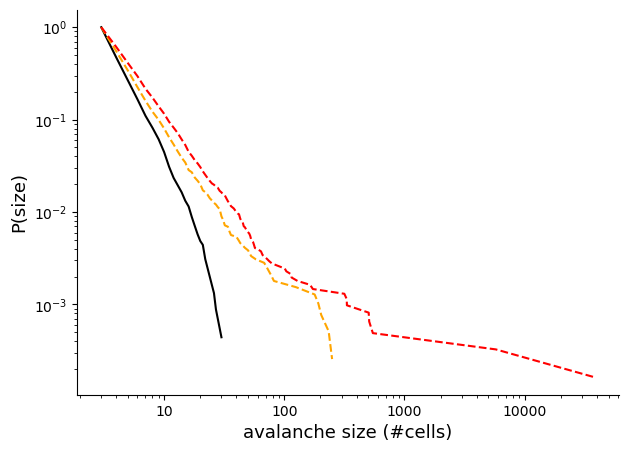

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


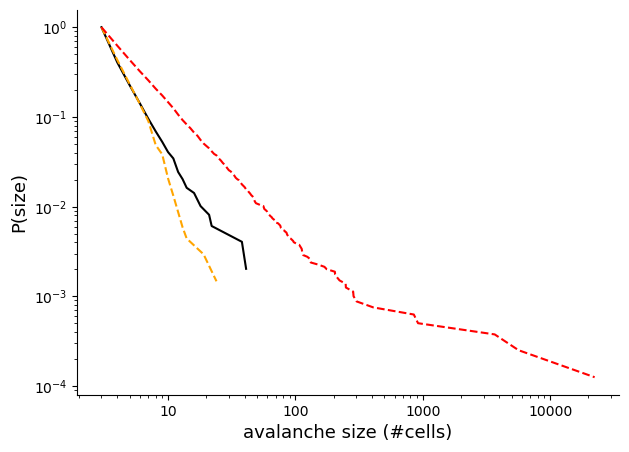

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


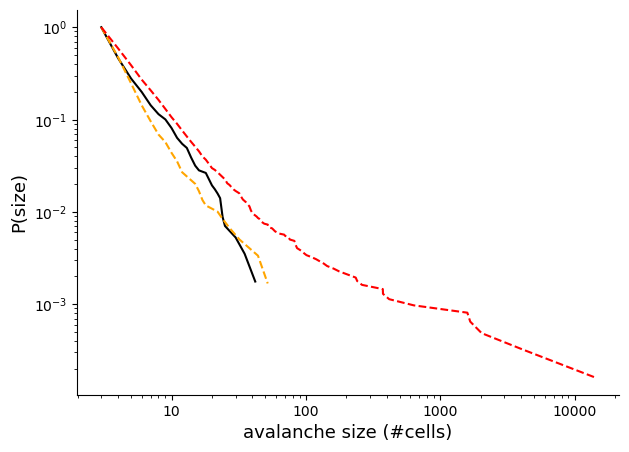

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


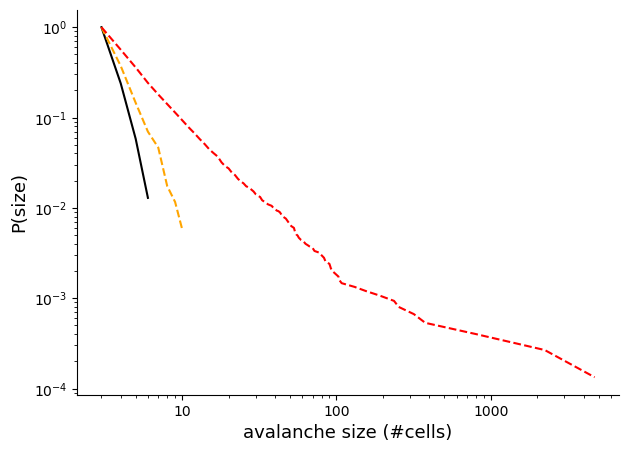

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


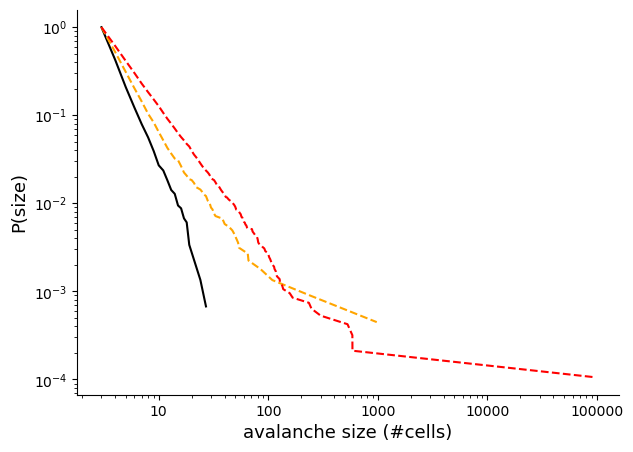

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


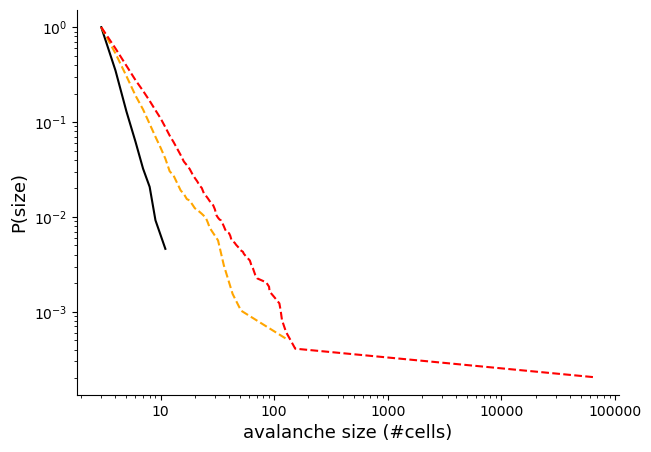

LLR -  bln = 590.634440272192 pre = 736.7606272996918 gen = 2966.548234696176
exp - bln = 3.35580379756699 pre = 2.916664209174921 gen = 2.441856072853068


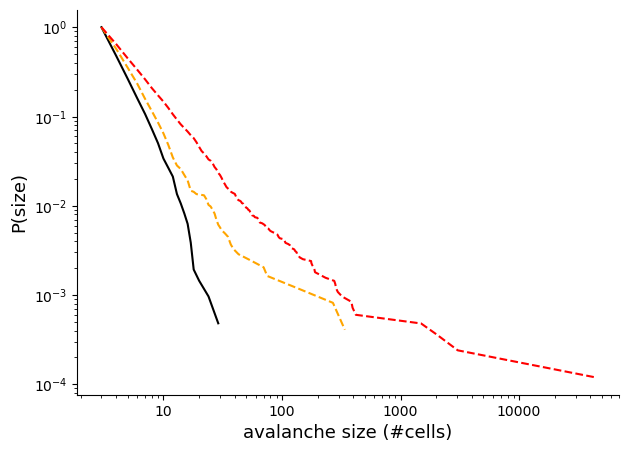

In [177]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '-']
choose = 0
for i in range(len(bln_av)):
    fig, axarr = plt.subplots(figsize = (7,5))
    
    powerlaw.plot_ccdf(bln_av[i][choose], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
    powerlaw.plot_ccdf(pre_av[i][choose], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
    powerlaw.plot_ccdf(p20_av[i][choose], linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'red')
    
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    print('LLR -  bln = ' + str(ok1) +  ' pre = ' + str(ok2) + ' gen = ' + str(ok3))
    print('exp - bln = ' + str(bln_exp) + ' pre = ' + str(pre_exp) + ' gen = ' + str(p20_exp))
    plt.show()

In [ ]:
#cut in half trace (first half)
#--------------------------------
for i in range(len(binlist)):
    half = np.load(binlist[i])[:, :4914]
    np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[i][:nnblist[i].find('nnb')] + 'cutbinarised.npy', half)

In [18]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*PTZ20*0.590*binarised.npy*')) #iterated list - binarised trace
avlist =  sorted(glob.glob('*-03*PTZ20*nnbav*npy*'))

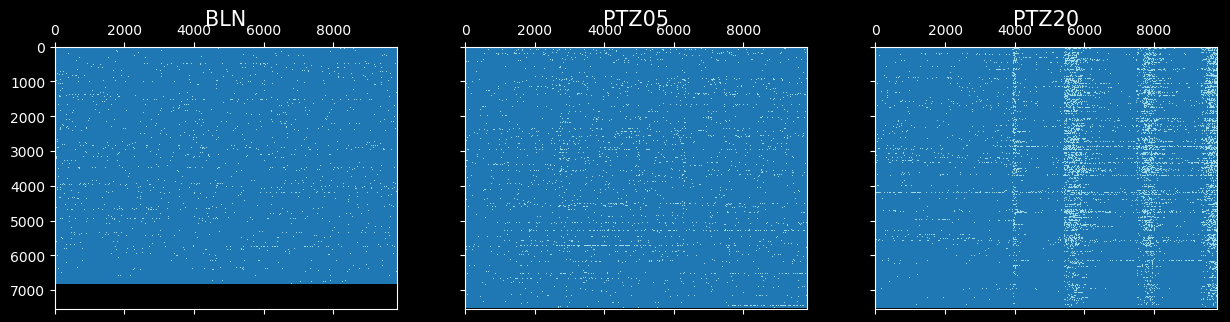

In [805]:
# PLOT - detected peaks
#---------------------------------------
pltfn.rasplot(namelist = binlist)

In [ ]:
# Avalanche calculation
#---------------------------------------------------------------------------
num = adfn.name_zero('front', 3, 3, 1)
for i in num:
    binlist = sorted(glob.glob('*-' + i +  '*PTZ20*binarised.npy*'))[9:] #iterated list - binarised trace
    nnblist = sorted(glob.glob('*-' + i + '*PTZ20*nnb.npy*')) 
    paramlist = [F10t, experiment]
    for t in range(len(binlist)):
        adfn.parallel(4, [nnblist, adfn.repeat_list(binlist[t], len(nnblist))], crfn.avalanche, paramlist)

## Null distributions
* calculate three null matrices
* calculate 50 distributions per fish

In [15]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
nnblist = sorted(glob.glob('*PTZ20*nnb.npy*')) 
binlist = sorted(glob.glob('*PTZ20*binarised*.npy*')) 
shufflist =  sorted(glob.glob('*shuffle*.npy*')) 
nnblist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy']

In [24]:
blnnnb

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.16nnb.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.16nnb.npy']

In [ ]:
# Null 1 - shuffle entire time series (randomise entire time series)
#------------------------------------------------------------------
import copy
num = adfn.name_zero('front', 2, 12, 1)
for i in num:
    nnblist = sorted(glob.glob('*E-' + i + '*PTZ20*nnb.npy*')) 
    binlist = sorted(glob.glob('*E-' + i +  '*PTZ20*binarised.npy*')) #iterated list - binarised trace
    shuffpkslist = list(range(50))
    for e in range(50):
        pks = np.load(binlist[0])
        rpks = copy.deepcopy(pks)
        rpks = rpks.ravel()
        np.random.shuffle(rpks) 
        rpks = np.reshape(rpks, pks.shape)
        shuffpkslist[e] = rpks
        av, pkg = crfn.avalanche1(nnblist[0], rpks, Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_shuffle' + str(e) + 'av.npy', av)

In [26]:
# Null 2 - swap cell location (shuffle binarised matrix) 
#---------------------------------------------------------------------------
import copy
num = adfn.name_zero('front', 3, 3, 1)
for i in num:
    nnblist = sorted(glob.glob('*-' + i + '*BLN*nnb.npy*')) 
    binlist = sorted(glob.glob('*-' + i +  '*BLN*binarised.npy*')) #iterated list - binarised trace
    swappkslist = list(range(10))
    for e in range(10):
        pks = np.load(binlist[0])
        rpks = copy.deepcopy(pks)
        np.random.shuffle(rpks) 
        swappkslist[e] = rpks
        #av, pkg = crfn.avalanche1(nnblist[0], rpks, Fdrop, experiment)
        #np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_swap' + str(e) + 'av.npy', av)

In [27]:
# Null 3 - slide time series 
#-------------------------------------------
import random
import copy

num = adfn.name_zero('front', 3, 3, 1)
for i in num:
    nnblist = sorted(glob.glob('*-' + i + '*BLN*nnb.npy*')) 
    binlist = sorted(glob.glob('*-' + i +  '*BLN*binarised.npy*')) #iterated list - binarised trace
    slidepkslist = list(range(10))
    for e in range(10):
        pks = np.load(binlist[0])
        rpks = np.zeros((pks.shape))
        for t in range(pks.shape[0]):
            rnum = random.randint(0, pks.shape[1])
            rpks[t] = np.roll(pks[t], rnum)
        slidepkslist[e] = rpks
        #av, pkg = crfn.avalanche1(nnblist[0], rpks, Fdrop, experiment)
        #np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_slide' + str(e) + 'av.npy', av)

In [ ]:
# Null 4 - destroy autocorrelation (shuffle each time series within cell)
#-------------------------------------------
import random
import copy

num = adfn.name_zero('front', 2, 12, 1)
for i in num:
    nnblist = sorted(glob.glob('*-' + i + '*BLN*nnb.npy*')) 
    binlist = sorted(glob.glob('*-' + i +  '*BLN*binarised.npy*')) #iterated list - binarised trace
    #autopkslist = list(range(10))
    for e in range(50):
        pks = np.load(binlist[0])
        rpks = np.zeros((pks.shape))
        for t in range(pks.shape[0]):
            temp_pks = pks[t]
            np.random.shuffle(temp_pks) 
            rpks[t] = temp_pks
        #autopkslist[e] = rpks
        av, pkg = crfn.avalanche1(nnblist[0], rpks, Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnblist][0], 'short') + '_auto' + str(e) + 'av.npy', av)

In [ ]:
for i in range(len(rpkslist)):
    fig, axarr = plt.subplots(1,2, figsize = (7,5))
    axarr[1].imshow(pre)
    axarr[0].imshow(autopkslist[i])
    plt.show()

In [11]:
rpks

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

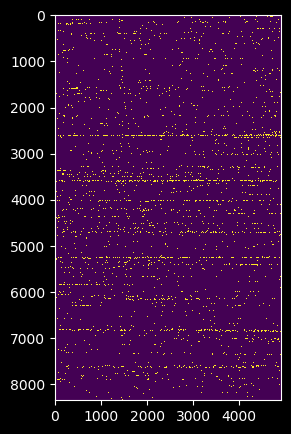

In [56]:
    fig, axarr = plt.subplots(figsize = (7,5))
pre = np.load(binlist[0])
plt.imshow(pre)
plt.show()

# Criticality models

<Figure size 432x288 with 0 Axes>

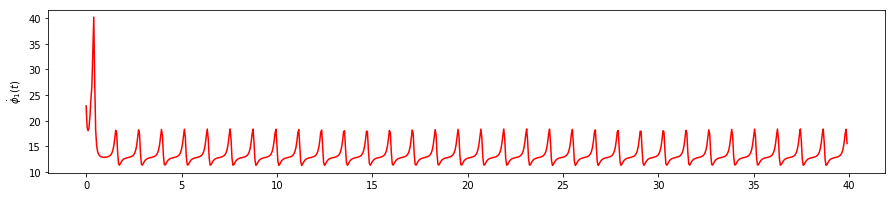

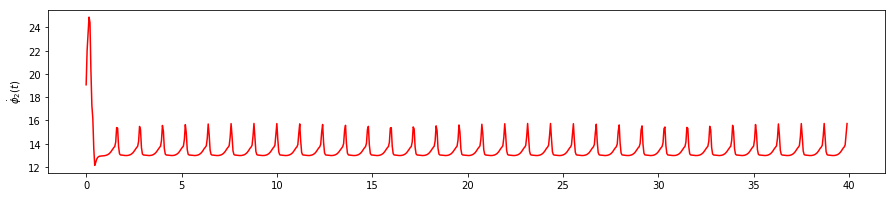

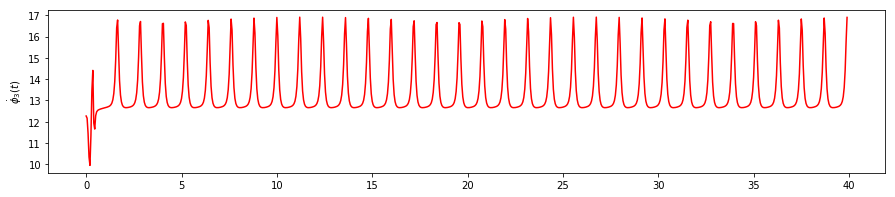

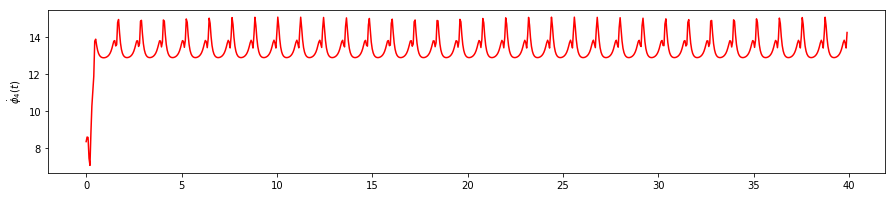

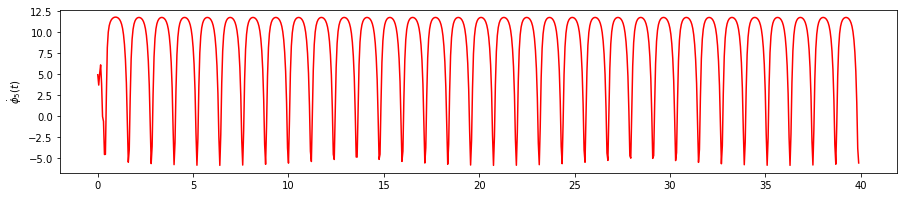

In [23]:
import numpy as np
import pylab as plt
#Passed arguments - dictionary with np arrays for:
#Y0 = initial phase
#W = intrinsic frequencies
#K = coupling matrix
_phase0 = np.array([0, np.pi,0,1, 5, 2, 3])
_freq = np.array([28,19,11,9, 2, 4])
_coupl = np.array([[ 2.3844,  1.2934,  0.6834,  2.0099,  1.9885],
                   [ -2.3854,  3.6510,  2.0467,  3.6252,  3.2463],
                   [ 10.1939,  4.4156,  1.1423,  0.2509,  4.1527],
                   [ 3.8386,  2.8487,  3.4895,  0.0683,  0.8246],
                   [ 3.9127,  1.2861,  2.9401,  0.1530,  0.6573]])
_coupl1 = np.array([[ 0.2628,  0.0043,  0.9399,  0.5107,  0.9857],
                   [ 0.8667,  0.8154,  0.4592,  0.9781,  0.0763],
                   [ 0.3723,  0.3856,  0.8374,  0.8812,  0.9419],
                   [ 0.1869,  0.2678,  0.9704,  0.2823,  0.3404],
                   [ 0.1456,  0.7341,  0.1389,  0.5602,  0.3823]])

_coupl = np.dstack((_coupl, _coupl1)).T

# Defining time array
t0, t1, dt = 0, 40, 0.05
T = np.arange(t0, t1, dt)
 
# Preparing oscillators with Kuramoto model
oscN = 5 # num of oscillators

phase0 = _phase0[:oscN]
freq = _freq[:oscN]
coupl = _coupl[:,:oscN,:oscN]

#Passing parameters as a dictionary
init_params = {'freq':freq, 'coupl':coupl, 'phase0':phase0}
 
# Running Kuramoto model
kuramoto = Kuramoto(init_params) #create new Kuramoto class with your parameters
#kuramoto.noise = 'logistic'
odePhi = kuramoto.solve(T)       #solve method (function of Kuramoto class) for your object, based on time array T
odeT = T[:-1]
 
# Plot the phases
plt.figure()

for comp in range(oscN):
    #plt.figure(figsize = (8,8))
    plt.subplots(1,1, figsize = (15,3))
    plt.plot(odeT, np.diff(odePhi[comp])/dt,'r')
    plt.ylabel('$\dot\phi_%i(t)$'%(comp+1))

#plt.suptitle("Instantaneous frequencies")
#plt.savefig('phases')
#plt.show()
    
# Computing phase dynamics
#phaseDynamics = np.diff(odePhi)/dt
 
# Plotting response
#nOsc = len(W)
#for osc in range(nOsc):
#    plt.subplot(nOsc, 1, 1+osc)
#    plt.plot(T[:-1], phaseDynamics[osc])
#    plt.ylabel("$\dot\phi_{%i}$" %(osc+1))
#plt.show()

In [19]:
from __future__ import print_function
import numpy as np
from scipy.integrate import ode


class Kuramoto():
    
    #DEFINE ARGUMENTS
    #dictonary containing numpy arrays for initial phase (phase0),
    #intrinsic frequencies (freq), coupling matrix (coupl)
    #---------------------------------------------------------
    def __init__(self, k_params):
        self.dtype = np.float32
        self.dt = 1. 
        self.phase0 = np.array(k_params['phase0'])
        self.freq = np.array(k_params['freq'])
        self.coupl = np.array(k_params['coupl'])
        self.n_osc = len(self.freq)  #how many oscillators
        self.m_order = self.coupl.shape[0] #cplmax

    #ODEs
    #Kuramoto ODE of mth harmonic order
    #freq1 = iterable frequency??
    #coupl1 = 3d coupling matrix, unless 1st order
    #--------------------------------------------------
    def kuramoto_ODE(self, t, y, arg):
        freq1, coupl1 = arg #input argument
        yt = y[:,None] #
        dy = y-yt    #????????
        phase = freq1.astype(self.dtype) #create phase variable of float type
    
        for m, _coupl1 in enumerate(coupl1):
            phase += np.sum(_coupl1*np.sin((m+1)*dy), axis = 1)
        return phase
    
    #JACOBIAN ODEs
    #JAcboian passed for ODE solver
    #--------------------------------------------------
    def kuramoto_ODE_jac(self, t, y, arg):
        freq1, coupl1 = arg #input argument
        yt = y[:,None] #
        dy = y-yt    #????????
        phase = [m*coupl1[m-1]*np.cos(m*dy) for m in range (1,1 + self.m_order)]
        phase = np.sum(phase, axis = 0)
        
        for i in range (self.n_osc):
            phase[i,i] = -np.sum(phase[:,i])
        return phase 
    
    #SOLVE ODEs
    #Solves Kuramoto ODE for time series t
    #with initial parameters when initiated object
    #--------------------------------------------------
    def solve(self,t):
        
        dt = t[1] - t[0]
        kODE = ode(self.kuramoto_ODE, jac = self.kuramoto_ODE_jac) #integrate differential equations
        kODE.set_integrator('dopri5')
        
        #set parameters into model
        kODE.set_initial_value(self.phase0, t[0])
        kODE.set_f_params((self.freq, self.coupl))
        kODE.set_jac_params((self.freq, self.coupl))
        
        phase = np.empty((self.n_osc, len(t)))
        
        #RUn ODE integrator
        for idx, _t in enumerate(t[1:]):
            phase[:,idx] = kODE.y
            kODE.integrate(_t)
        phase[:,-1] = kODE.y
        
        return phase


In [ ]:
#kernel density estimate
#---------------

fig, ax = plt.subplots(figsize= (12,12))
dotplot = plt.scatter(Fishcoordz[pracstack][0][:,0], Fishcoordz[pracstack][0][:,1], s=20, c = 'r', alpha = 0.005)
fig.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

x = Fishcoordz[pracstack][0][:,0]
y = Fishcoordz[pracstack][0][:,1]
nbins = 20
axes.set_title('Hexbin')
axes.hexbin(x, y, gridsize=nbins, cmap=plt.cm.magma)

os.chdir(Ffig)
plt.savefig('hexheatmapav.svg', transparent = True)

In [ ]:
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
#x, y = data.T
data.T.shape

In [ ]:
from scipy.stats import kde
trans = Fishcoordz[pracstack][0][:,:2].T
k = kde.gaussian_kde(trans)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

axes.set_title('Calculate Gaussian KDE')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)


In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

axes.set_title('2D Density with shading')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.magma)


os.chdir(Ffig)
plt.savefig('2dkeheatmapav.png')

In [ ]:
pracstack = np.zeros((1,0)).astype(int)

for i in range(len(avcoord)):
    pracstack = np.hstack((avcoord[i], pracstack))
    

In [ ]:
#avalanche extent
#--------------------------


#avalanche size
#--------------------------
sizeav9 = np.zeros(82)

for i in range(82):
    sizeav9[i] = avcoord[i][0].shape[0]

In [ ]:
s1 = pd.Series(sizeav1, name='fish1')
#s2 = pd.Series(sizeav2, name='fish2')
s3 = pd.Series(sizeav3, name='fish3')
s4 = pd.Series(sizeav4, name='fish4')
s5 = pd.Series(sizeav5, name='fish5')
s6 = pd.Series(sizeav6, name='fish6')
#s7 = pd.Series(sizeav7, name='fish7')
s8 = pd.Series(sizeav8, name='fish8')
#s9 = pd.Series(sizeav9, name='fish9')
df = pd.concat([s1,s3, s4, s5, s6,  s8], axis=1)

In [ ]:
#plot av size
#----------------------------

import pandas as pd

ax = df.plot.kde(figsize=(34,16), style = '-', linewidth = 5, legend = False, fontsize = 40, alpha = 0.8)
ax.set_xlabel("Seizure avalanche size [cells]", fontsize = 40)
ax.set_ylabel("Density", fontsize = 40)

os.chdir(Ffig)
plt.tight_layout()
plt.savefig('supravdistribution.png')

In [ ]:
avcoord[130]

In [ ]:
#SPATIAL EXTENT
#------------------
#metrically scaled coordinates

dim = [.8, .8, 15]
coord = Fishcoordz6
mcs  = np.multiply(coord, dim)  


meandistance7 = np.zeros(130)
for i in range(130):
    #calculate mean coords for all avalanche
    distance = np.zeros(mcs[avcoord[i][0]].shape[0])
    meanx = np.mean(mcs[avcoord[i][0]][:,0])
    meany = np.mean(mcs[avcoord[i][0]][:,1])
    meanz = np.mean(mcs[avcoord[i][0]][:,2])
    meancoord = np.hstack((meanx,meany,meanz))
    #find euclidean distance for each coordinate
    #loop through each cell in avalanche|
    for j in range(mcs[avcoord[i][0]].shape[0]):
        distance[j] = np.linalg.norm(meancoord-mcs[avcoord[i][0]][j])
    meandistance7[i] = np.mean(distance)

In [ ]:
s1 = pd.Series(meandistance1, name='fish1')
s2 = pd.Series(meandistance2, name='fish2')
s3 = pd.Series(meandistance3, name='fish3')
s4 = pd.Series(meandistance4, name='fish4')
s5 = pd.Series(meandistance5, name='fish5')
s6 = pd.Series(meandistance6, name='fish6')
s7 = pd.Series(meandistance7, name='fish7')
s8 = pd.Series(meandistance8, name='fish8')
s9 = pd.Series(meandistance9, name='fish9')
df = pd.concat([s1, s2, s3, s5, s6, s7, s8, s9], axis=1)

In [ ]:

import pandas as pd

ax = df.plot.kde(figsize=(34,16), style = '-', linewidth = 5, legend = False, fontsize = 40, alpha = 1)
ax.set_xlabel("Seizure avalanche spatial extent ", fontsize = 40)
ax.set_ylabel("Density", fontsize = 40)

os.chdir(Ffig)
plt.tight_layout()
plt.savefig('supravextentdistribution.png')

In [ ]:
#save video
#---------------
avnum = 9

os.chdir(Ffig)

for i in range(50):
    fig, ax = plt.subplots(figsize= (12,12))
    master = plt.scatter(Fishcoordz[:,0], Fishcoordz[:,1], s=20, c = 'k', alpha = 0.1)
    dotplot = plt.scatter(Fishcoordz[avcoord[i]][:,0], Fishcoordz[avcoord[i]][:,1], s=20, c = 'r', alpha = 1)
    fig.gca().set_aspect('equal', adjustable='box')
    plt.savefig('av' + str(i) + '.tiff')


from skimage import io
from PIL import Image

os.chdir(Ffig)
ogli = sorted(glob.glob('*.tiff'))
omlist = []

for i in range(len(ogli)-1):
    readme = io.imread(Ffig + 'av' + str(i) + '.tiff')
    omlist.append(Image.fromarray(readme))
    #omlist.append(Image.fromarray(rotimglist[i]).convert('L'))
    
omlist[0].save(Ffig + "avmovie.tif", save_all=True,
               append_images=omlist[1:])

# RIP ----- Code Graveyard

In [ ]:
#PARALLEL PROCESS - without function
#-------------------------------------

#Calculate nearest neighbours for each cell 
#rng = nearest number of cells with which to build neighbour graph from
#dim = define distance of each pixel in x,y,z, cnt = select which % of neighbours to include
#cnt = 0.06, 0.14
#-------------------------------------------------------------------------------------------------
from multiprocessing import Pool
savepath = F10t
processes = 4
pool = Pool(processes)

paramlist = list(range(4))
count = 0
for i in range(np.int(len(coordlist)/processes)):
    paramlist = [Fdrop, experiment, coordlist[count:count+1], 6000, [.8, .8, 15], 0.1], [Fdrop, experiment, coordlist[count+1:count+2], 6000, [.8, .8, 15], 0.1], [Fdrop, experiment, coordlist[count+2:count+3], 6000, [.8, .8, 15], 0.1], [Fdrop, experiment, coordlist[count+3:count+4], 6000, [.8, .8, 15], 0.1]
    pool.starmap(crfn.neighbour, [(paramlist[0]), (paramlist[1]),(paramlist[2]), (paramlist[3])])
    if i == 4:
        paramlist = [Fdrop, experiment, coordlist[20:21], 6000, [.8, .8, 15], 0.1], [Fdrop, experiment, coordlist[21:22], 6000, [.8, .8, 15], 0.14]
        pool.starmap(crfn.neighbour, [(paramlist[0]), (paramlist[1])])
    count+=4
    

In [ ]:
#ORDER NAMES
#-----------------


#=======================================================================
def order(datalist, n, cond, mode, block): # Select which fish data to visualise
#=======================================================================
    import numpy as np
    
    # Plot longest block of data
    #-------------------------------------------------------------
    if mode == 'longest':
        mylist = datalist
        sublist = list(range(n*cond))
        count = 0

        for i in range(len(mylist)):
            if i == len(mylist)-1:
                sublist[count] = mylist[i]
            else:
                name1 = mylist[i][:mylist[i].find('run')-1]
                name2 = mylist[i+1][:mylist[i+1].find('run') -1]
                if name1 != name2:
                    sublist[count] = mylist[i]
                    count+=1
        return(sublist)
    
        # Plot all 30 minute block of data
        #-------------------------------------------------------------
    if mode == 'half':
        mylist =datalist
        sublist = list(range((n*cond)))
        count = 0
        for i in range(len(mylist)):
            if '30.npy' in mylist[i]: 
                sublist[count] = mylist[i]
                count+=1
            if '30' + str(block) + '.npy' in mylist[i]: 
                sublist[count] = mylist[i]
                count+=1
        return(sublist)
    

In [ ]:
#AVALANCHE DURATION - OLD WAY
#------------------------------

    #find the max length of avalanches
    #----------------------------------
noavlist = 0
index = []
for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
    if f > 0:  
        if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
            noavlist +=1
            if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                index = f 
                break
        #calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
time = np.zeros(index, dtype = 'int')#vector of length index
for o in range(index):
    time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])
        
                    
#avlist[y] = time
#pkglist[y] = pkg

#AVALANCHE SIZE - OLD WAY
#------------------------------

#Calculate size based on duration (each avalanche at each time point treated as a distinct event)
#-------------------------------------
newavlist = list(range(len(praclist)))   
for i in range(len(praclist)):
    pkg = np.load(pracpkg[i])

    binarray = np.load(binlist[i])
    av = np.array([])

            #loop through all time points
            #find all unique indeces at each time point where there is a value of 1 for a peak
            #append these coactivation values together to calculate total number of activations per time point
            #--------------------------------------------------------------------------------
    for t in range(binarray.shape[1]): 
        comms = np.unique(pkg[:,t][pkg[:,t] > 0])   
        for c in comms:
            av = np.append(av, pkg[:,t][pkg[:,t] == c].shape[0])    
    
    newavlist[i] = av
    np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[i][:nnblist[i].find('nnb')] + 'opracavsizelist.npy', newavlist[i])

In [ ]:

#=======================================================================
def avplot(histlist, mode, plot, n): # Plot av distribution
#=======================================================================
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    import os


    if mode == 'size':
        if plot == 'single':
            n = n*3
            fig, ax = plt.subplots(figsize = (6,6))
            plt.scatter(np.log(np.load(histlist[n])[1][:-1]), np.log(np.load(histlist[n])[0]/np.sum(np.load(histlist[n])[0])), label = 'baseline', s = 20)
            plt.scatter(np.log(np.load(histlist[n+1])[1][:-1]), np.log(np.load(histlist[n+1])[0]/np.sum(np.load(histlist[n+1])[0])), label = 'ptz5mm', s=20)
            plt.scatter(np.log(np.load(histlist[n+2])[1][:-1]), np.log(np.load(histlist[n+2])[0]/np.sum(np.load(histlist[n+2])[0])), label = 'ptz20mm', s = 20, c = 'r')
            plt.show()
            
        # Multi plot size and calculate exponent
        #--------------------------------------------------------------------------------------
        if plot == 'all':
            f, axarr = plt.subplots(4,3,sharey=True, sharex=True, figsize = (20,20))
            f.subplots_adjust(hspace=0)
            axarr = axarr.flatten()
            
            icounter = 0
            plt.subplots_adjust(wspace=0, hspace=0)
            for i in range(int(len(histlist)/3)):
                axarr[i].scatter(np.log(np.load(histlist[icounter])[1][:-1]), np.log(np.load(histlist[icounter])[0]/np.sum(np.load(histlist[icounter])[0])), label = 'baseline', s = 8)
                axarr[i].scatter(np.log(np.load(histlist[icounter+1])[1][:-1]), np.log(np.load(histlist[icounter+1])[0]/np.sum(np.load(histlist[icounter+1])[0])), label = 'ptz5mm', s=8)
                axarr[i].scatter(np.log(np.load(histlist[icounter+2])[1][:-1]), np.log(np.load(histlist[icounter+2])[0]/np.sum(np.load(histlist[icounter+2])[0])), label = 'ptz20mm', s = 8, c = 'r')
                icounter = icounter + 3

            axarr[7].set_xlabel('Avalanche size', fontsize = 40)
            axarr[3].set_ylabel('Probability', fontsize = 40)
            plt.show()
            
            
    # Define histogram parameters
    #-----------------------------------------------------------           
    if mode == 'dur':
            
        if plot == 'single':
            n = n*3
            fig, ax = plt.subplots(figsize = (6,6))
            xlist = np.linspace(0, len(np.load(histlist[n])), len(np.load(histlist[n])))
            plt.scatter(np.log(xlist), np.log(np.load(histlist[n]))/np.log(np.sum(np.load(histlist[n]))), label = 'baseline', s=50)
            plt.scatter(np.log(xlist), np.log(np.load(histlist[n+1]))/np.log(np.sum(np.load(histlist[n+1]))), label = 'ptz5mm', s=50)
            plt.scatter(np.log(xlist), np.log(np.load(histlist[n+2]))/np.log(np.sum(np.load(histlist[n+2]))), label = 'ptz20mm', s=50, c = 'r')
            plt.show()
            

            
            
            
        # Multiple plot duration
        #---------------------------------------------------------------------------------------
        if plot == 'all':

            f, axarr = plt.subplots(4,3,sharey=True, sharex=True, figsize = (20,20))
            f.subplots_adjust(hspace=0)
            axarr = axarr.flatten()
            icounter = 0

            plt.subplots_adjust(wspace=0, hspace=0)
            xlist = np.linspace(0, len(np.load(histlist[n])), len(np.load(histlist[n])))

            for i in range(int(len(histlist)/3)):
                axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter]))/np.log(np.sum(np.load(histlist[icounter]))), label = 'baseline', s = 15)
                axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter+1]))/np.log(np.sum(np.load(histlist[icounter+1]))), label = 'ptz5mm', s=15)
                axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter+2]))/np.log(np.sum(np.load(histlist[icounter+2]))), label = 'ptz20mm', s = 15, c = 'r')
                axarr[i].legend(loc='upper left')
                icounter = icounter + 3

            axarr[7].set_xlabel('Avalanche duration', fontsize = 40)
            axarr[3].set_ylabel('Probability', fontsize = 40)
            plt.show()


In [ ]:
#Old avalanche duration
#=======================================================================
def avduration(nnblist, binlist, Fdrop, experiment): # calculate avalanche duration, duration = normal (no convergence, cells in t must be active in t+1)
#=======================================================================
    import numpy as np
    import os
    import itertools

#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))   
    pkglist = list(range(len(nnblist))) 
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(binarray.shape[1]) + ' for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker
        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]  
    
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not part of an avalanche - and mark them as avalanche
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
       

        #Calculate unique avalanche marker values for each time point
        #------------------------------------------------------------
        print('Now calculating avalanche duration')
        
        
        
        if binarray.shape[1] == 4914:
            uniqvalist = list(range(pkg.shape[1])) #empty list of length time frames
            for e in range(pkg.shape[1]): #loop through each time point in pkg
                uniqval = np.unique(pkg[:,e]) #unique marker value in each time point
                uniqvalist[e] = uniqval #fill list of unique values in each time point
            
            #link entire recording together
            #-----------------------------------------------------------
            linktime = list(itertools.chain(*uniqvalist)) #vector of all unique marker values in each time bin linked together
            
            #find the max length of avalanches
            #----------------------------------
            noavlist = 0
            index = []
            for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
                if f > 0:  
                    if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
                        noavlist +=1
                        if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                            index = f 
                            break
        
        #calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
            time = np.zeros(index, dtype = 'int') #vector of length index
            for o in range(index):
                time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avdurlist30.npy', time)
    
    
        if binarray.shape[1] == 9828:
               
            uniqvalist = list(range(pkg.shape[1])) #empty list of length time frames
            uniqvalist1 = list(range(np.int(pkg.shape[1]/2))) #empty list of length time frames
            uniqvalist2 = list(range(np.int(pkg.shape[1]/2))) #empty list of length time frames
    
            for e in range(pkg.shape[1]): #loop through each time point in pkg
                uniqval = np.unique(pkg[:,e]) #unique marker value in each time point
                uniqvalist[e] = uniqval #fill list of unique values in each time point
                uniqvalist1 = uniqvalist[:np.int(pkg.shape[1]/2)]
                uniqvalist2 = uniqvalist[np.int(pkg.shape[1]/2):]
                
                #link entire recording together
                #-----------------------------------------------------------
            linktime = list(itertools.chain(*uniqvalist)) #vector of all unique marker values in each time bin linked together
            linktime1 = list(itertools.chain(*uniqvalist1)) 
            linktime2 = list(itertools.chain(*uniqvalist2)) 
                #find the max length of avalanches
                #----------------------------------
            noavlist = 0
            index = []
            for f in range(pkg.shape[1]): #loop through all time points in pkg to find longest length
                if f > 0:  
                    if len(np.where(np.unique(linktime, return_counts = 'True')[1] == f)[0]) == 0: #find how many avalanches occur for each number of frames - each time you find an avalanche duration that has 0 avalanches - add to z list - keep iterating however as some avalanche lengths may skip frames - e.g. you may have no avalanche 5 frames long, but some 6.. etc long
                        noavlist +=1
                        if noavlist > 50: #once you have reached 50 empty avalanche durations set vector length to this and break
                            index = f 
                            break
        #calculate how long each marker value is repeated for consecutively - any repeat must be a consecutive time frame
            time = np.zeros(index, dtype = 'int')
            time1 = np.zeros(index, dtype = 'int') 
            time2 = np.zeros(index, dtype = 'int') #vector of length index
            for o in range(index):
                time[o] = len(np.where(np.unique(linktime, return_counts = 'True')[1] == o)[0])
                time1[o] = len(np.where(np.unique(linktime1, return_counts = 'True')[1] == o)[0])
                time2[o] = len(np.where(np.unique(linktime2, return_counts = 'True')[1] == o)[0])

            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')]  + 'avdurlist60.npy', time)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')]  + 'avdurlist30a.npy', time1)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')]  + 'avdurlist30b.npy', time2)
        
                    
        avlist[y] = time
        pkglist[y] = pkg
        np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avdurpkg.npy', pkg)
    return(avlist, pkglist)


        

In [ ]:
#Old avalanche size calculation
#=======================================================================
def avsize(nnblist, binlist, Fdrop, experiment): # calculate avalanche sizes, size = each distinct avalanche in a distinct time frame is counted
#=======================================================================
    import numpy as np
    import os 

#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))   
    pkglist = list(range(len(nnblist))) 
    
    #Loop through all fish
    #-----------------------------------------------------------------
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        act_t  = np.where(np.sum(binarray, axis=0) > 3)[0] #Time points with at least 3 cells active
        i = 0 
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + ' of ' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1    
            
            #Label each time point (of >3 cells active) with marker value and add to it as it grows
            #--------------------------------------------------------------------------------------
            marker  = 1    #set a marker
            cid = np.where(binarray[:,t] > 0)[0] #cid is list of cells at this time point (>3 cells active) that are firing at time frame t
            
            #Loop through all cells in current time frame with a cell firing
            #if currently unlabelled, label with marker + 1
            #fill empty matrix with ones as all starting points
            #--------------------------------------------------------------------------------------        
            for c in cid:  
                if pkg[c,t] == 0:       
                    marker = marker + 1
                    pkg[c,t] = marker    
            
            #Find all neighbours
            #nb = indeces of neighbours of cell c
            #tgr = indeces that are common to both cid and nb - cells that are active and neighbours 
            #-------------------------------------------------------------------
                nb   = np.where(nnbarray[c,:] > 0)[0]  
                tgr  = np.intersect1d(cid,nb)   
                
                #Fill all pkg at time point t with marker value so they are the same
                #-------------------------------------------------------------------
                pkg[tgr,t] = pkg[c,t]   
        # For each time point count number of coactivations
        #----------------------------------------------------------------------------
        print('Now calculating avalanche size')
        if binarray.shape[1] == 4914:
            av = np.array([])
            for t in range(binarray.shape[1]): 
                comms = np.unique(pkg[:,t][pkg[:,t] > 0])   
                for c in comms:
                    av = np.append(av, pkg[:,t][pkg[:,t] == c].shape[0])
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist30.npy', av)
            
        if binarray.shape[1] == 9828:
            av = np.array([])
            av1 = np.array([])
            av2 = np.array([])
            #loop through all time points
            #find all unique indeces at each time point where there is a value of 1 for a peak
            #append these coactivation values together to calculate total number of activations per time point
            #--------------------------------------------------------------------------------
            for t in range(binarray.shape[1]): 
                comms = np.unique(pkg[:,t][pkg[:,t] > 0])   
                for c in comms:
                    av = np.append(av, pkg[:,t][pkg[:,t] == c].shape[0]) 
                    if t < np.int(binarray.shape[1]/2):
                        av1 = np.append(av1, pkg[:,t][pkg[:,t] == c].shape[0])
                    if t > (np.int(binarray.shape[1]/2) - 1):
                        av2 = np.append(av2, pkg[:,t][pkg[:,t] == c].shape[0])
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist60.npy', av)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist30a.npy', av1)
            np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizelist30b.npy', av2)
        pkglist[y] = pkg
        avlist[y] = av
        np.save(Fdrop + 'Project/' + experiment + os.sep + nnblist[y][:nnblist[y].find('nnb')] + 'avsizepkg.npy', pkg)
    return(avlist, pkglist)

In [ ]:
#old histogram calculation
#=======================================================================
def hist(Fdrop, experiment, sublist, mode): # Select which fish data to visualise
#=======================================================================
    import numpy as np
    import os
    
    if mode == 'size':
        blnlist = list(range(np.int(len(sublist)/3)))
        counter = 0
        for i in range(len(sublist)):
            if 'BLN' in sublist[i]:
                blnlist[counter] = sublist[i]
                counter +=1

        # Define histogram parameters
        #-----------------------------------------------------------
        countlist = list(range(len(sublist)))
        countblnlist = list(range(len(sublist)))
        htlist = list(range(len(sublist)))
        maxlist = list(range(len(sublist)))
        minlist = list(range(len(sublist)))

        #binning for ptz conditions
        for i in range(len(sublist)):
            countlist[i] = np.load(sublist[i])
            maxlist = max(map(lambda x: x, countlist[i]))
            minlist = min(map(lambda x: x, countlist[i]))
        maxi = np.max(maxlist)
        mini = np.min(minlist)
        bind = np.linspace(mini, maxi, 500)

        #binning for bln conditions
        for i in range(len(blnlist)):
            countblnlist[i] = np.load(sublist[i])
            blnmaxlist = max(map(lambda x: x, countblnlist[i]))
            blnminlist = min(map(lambda x: x, countblnlist[i]))
        blnmaxi = np.max(blnmaxlist)
        blnmini = np.min(blnminlist)
        bindbln = np.linspace(blnmini, blnmaxi, 500)

        # Make histogram bins
        #-----------------------------------------------------------
        for y in range(len(htlist)):
            avdist = countlist[y]
            avdistcut  = avdist[avdist >= 2]
            if 'BLN' in sublist[y]:
                hist = np.histogram(avdistcut, bins = bindbln)
                htlist[y] = hist
                np.save(Fdrop + 'Project/' + experiment +os.sep + sublist[y][:sublist[y].find('run')+6] + '_' + 'opracavsizehist.npy', hist)
            else:
                hist = np.histogram(avdistcut, bins = bind)
                htlist[y] = hist
                np.save(Fdrop + 'Project/' + experiment +os.sep + sublist[y][:sublist[y].find('run')+6] + '_' + 'opracavsizehist.npy', hist)
        return(htlist)
        
    if mode == 'dur':     
        countlist = list(range(len(sublist)))
        htlist = list(range(len(sublist)))
        durmaxlist = list(range(len(sublist)))

        for i in range(len(sublist)):
            countlist[i] = np.load(sublist[i])
            durmaxlist[i] = np.max(np.where(countlist[i] > 0) [0])
        durmaxi = np.max(durmaxlist)
        xlist = np.linspace(0, durmaxi, durmaxi+3)

        for i in range(len(sublist)):
            addon = len(xlist) - countlist[i].shape[0]
            addzeros = np.zeros(addon)
            htlist[i] = np.append(countlist[i], addzeros)
            np.save(Fdrop + 'Project/' + experiment +os.sep + sublist[i][:sublist[i].find('run')+6] + '_' + 'opracavdurhist.npy', htlist[i])
        return(htlist)

In [ ]:
# calculates number of cells in each distinct avalanche event (takes ages)
#=======================================================================
def distinctduration(nnblist, binlist): # duration = normal, size = calculate from unique cells in duration
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    distlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        distinctlist = (np.zeros(1)) #list containing updated number of distinct cells per avalanche
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            #if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            #i = i+1
            print('done time point' + ' ' + str(t))
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker
                        distinctlist = np.hstack((distinctlist, (np.zeros(1)))) #once each marker is created append empty element to distinctlist vector for future addition
                        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]
                
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:                    
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not part of an avalanche - and mark them as avalanche
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
                    
                    #if avalanche ends at this time point then calculate unique cells in this avalanche
                    if np.sum(intersect) == 0:
                        distinctlist[(np.int(n))] = len(np.unique(np.where(pkg == n)[0]))                                     
        avlist[y] = pkg
        distlist[y] = distinctlist
        
    return(avlist, distinctlist)


In [ ]:
#=======================================================================
def test2(nnblist, binlist): # duration = no convergence, cells in t need not be active in t+1, neighbours can be active
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker

        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]
                
            
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not already part of another avalanche - and mark them as current avalanche
                    
                    neighboursnow = np.where(nnbarray[cgroup,:] > 0)[1]   #all neighbours of currently active cells
                    intersectneighcellt1 = np.intersect1d(neighboursnow,cid2) #cells active in next time point and neighbours of current time frame
                    
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for cells in last time point who are also active in next time point
                    pkg[intersectneighcellt1,t+1] = pkg[cgroup[0],t] #carry over marker value for neighbours of cells active in last time point, who are active in next
          
        avlist[y] = pkg    
    return(avlist)


In [ ]:
#avalanche distribution plotting regimes
#-----------------------------------------


f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,20))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()
icounter = 0

plt.subplots_adjust(wspace=0, hspace=0)

for i in range(int(len(critfold)/3)):
    axarr[i].scatter(np.log(ahlist[icounter][1][:-1]), np.log(ahlist[icounter][0])/np.log(np.sum(ahlist[icounter][0])), label = 'baseline', s = 50)
    axarr[i].scatter(np.log(ahlist[icounter+1][1][:-1]), np.log(ahlist[icounter+1][0])/np.log(np.sum(ahlist[icounter+1][0])), label = 'ptz5mm', s=50)
    axarr[i].scatter(np.log(ahlist[icounter+2][1][:-1]), np.log(ahlist[icounter+2][0])/np.log(np.sum(ahlist[icounter+2][0])), label = 'ptz20mm', s = 50, c = 'r')
    #axarr[i].legend(loc='upper left')
    icounter = icounter + 3



axarr[7].set_xlabel('Avalanche size', fontsize = 40)
axarr[3].set_ylabel('Probability', fontsize = 40)

#$10^1$','$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$' ), size = 15, color = 'white')
#plt.yticks(np.arange(15), (

#axarr[8].set_xticklabels([(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15) 
#axarr[7].set_xticklabels(['-0.2', '-0.2','0', '0.2', '0.4', '0.6'], fontsize = 15)
axarr[6].set_xticklabels(['$\mathregular{2x10^2}}$', '$\mathregular{10^1}}$','$\mathregular{10^2}}$', '$\mathregular{10^3}}$', '$\mathregular{10^4}}$', '$\mathregular{2x10^2}}$'], fontsize = 15)
axarr[0].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[3].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[6].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[0].locator_params(axis='x', nbins=5)

axarr[0].yaxis.set_tick_params(labelsize = 20)
axarr[8].xaxis.set_tick_params(labelsize=20)
axarr[3].yaxis.set_tick_params(labelsize = 20)
axarr[6].xaxis.set_tick_params(labelsize=20)
axarr[6].yaxis.set_tick_params(labelsize = 20)
axarr[7].xaxis.set_tick_params(labelsize=20)
axarr[2].legend(loc = 1, markerscale = 2,prop={'size': 30})


axarr[8].plot(x0, line0, c = 'k', linestyle = '--', linewidth = 3)
axarr[8].plot(x1, line1, c = 'k', linestyle = '--', linewidth = 3)
axarr[8].plot(x2, line2, c = 'k', linestyle = '--', linewidth = 3)




f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,20))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()

plt.subplots_adjust(wspace=0, hspace=0)

for i in range(int(len(datalist))):
    bln  = datalist[i].iloc[0,:]
    p5 = datalist[i].iloc[1,:]
    p20 = datalist[i].iloc[2,:]
    x = np.linspace(1, bln.shape[0], num = bln.shape[0])
    axarr[i].scatter(np.log(x), np.log(bln)/np.log(np.sum(bln)), label = 'baseline', s=50)
    axarr[i].scatter(np.log(x), np.log(p5)/np.log(np.sum(p5)), label = 'ptz5mm', s=50)
    axarr[i].scatter(np.log(x), np.log(p20)/np.log(np.sum(p20)), label = 'ptz20mm', s=50, c = 'r')
    #axarr[i].legend(loc='upper left')

axarr[7].set_xlabel('Avalanche duration', fontsize = 40)
axarr[3].set_ylabel('Probability', fontsize = 40)

axarr[6].set_xticklabels(['$\mathregular{2x10^2}}$', '$\mathregular{10^{0}}$','$\mathregular{10^{1}}$', '$\mathregular{10^{2}}$', '$\mathregular{10^{3}}$', '$\mathregular{10^{4}}$', '$\mathregular{10^{5}}$'], fontsize = 15)
axarr[0].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[3].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[6].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[0].locator_params(axis='x', nbins=7)


axarr[0].yaxis.set_tick_params(labelsize = 20)
axarr[8].xaxis.set_tick_params(labelsize=20)
axarr[3].yaxis.set_tick_params(labelsize = 20)
axarr[6].xaxis.set_tick_params(labelsize=20)
axarr[6].yaxis.set_tick_params(labelsize = 20)
axarr[7].xaxis.set_tick_params(labelsize=20)
axarr[2].legend(loc = 1, markerscale = 2, prop={'size': 30})


axarr[5].plot(x0[:80], line0[:80], c = 'k', linestyle = '--', linewidth = 3)
axarr[5].plot(x1[:80], line1[:80], c = 'k', linestyle = '--', linewidth = 3)
axarr[5].plot(x2[:130], line2[:130], c = 'k', linestyle = '--', linewidth = 3)


os.chdir(Ffig)
plt.savefig('avalancheduration.png')